# Understand the Data



In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify
import plotly.express as px  
import plotly.graph_objects as go  
from wordcloud import WordCloud


import warnings
warnings.filterwarnings('ignore')


In [2]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\Hastag_Analysis\conflicts_hashtag_search.csv'
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(7)

,fromSocial,text,likesCount,commentsCount,viewsCount,input,authorMeta/name,creationDate
869,instagram,ð¨ Breaking News: Ferry Incident at Russian ...,0.0,0.0,NaN,russiaukraineconflict,Suaid Ishak,2024-08-22T18:34:34.000Z
1002,instagram,Ukrainian reports claim they have sunk a Russi...,66.0,1.0,NaN,russiaukraineconflict,Just 60 words,2024-08-04T18:55:26.000Z
2284,instagram,â­ à´à´±à´¾âà´¨àµà´±àµ à´¤à´¿à´°à´¿à´àµ...,1412.0,29.0,NaN,israelpalestineconflict,Madhyamam,2024-08-03T03:50:35.000Z
382,instagram,Gedanken zum 07. Oktober 2023.\n\n#politik #an...,19.0,0.0,NaN,israelpalestineconflict,Der kritische Streetworker,2024-10-07T07:36:21.000Z
1561,instagram,Russia has moved aggressively to block Ukraine...,34.0,0.0,NaN,russiaukraineconflict,humanity pr0ject,2024-05-26T04:20:34.000Z
959,instagram,"ð¬ In a dramatic turn, Ukraine's skies now f...",14.0,0.0,NaN,russiaukraineconflict,Politicinema,2024-08-06T12:02:05.000Z
746,instagram,â¼ï¸follow @thenormalnews ð¾ðªThis week ...,806.0,48.0,NaN,yemencivilwar,Normal,2020-07-16T00:48:05.000Z


In [3]:
df.size

20368

In [4]:
df.shape

(2546, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fromSocial       2546 non-null   object 
 1   text             2543 non-null   object 
 2   likesCount       2545 non-null   float64
 3   commentsCount    2545 non-null   float64
 4   viewsCount       321 non-null    float64
 5   input            2546 non-null   object 
 6   authorMeta/name  2483 non-null   object 
 7   creationDate     2545 non-null   object 
dtypes: float64(3), object(5)
memory usage: 159.3+ KB


In [6]:
df.describe(include='all')

,fromSocial,text,likesCount,commentsCount,viewsCount,input,authorMeta/name,creationDate
count,2546,2543,2545.000000,2545.000000,3.210000e+02,2546,2483,2545
unique,2,2455,NaN,NaN,NaN,3,993,2539
top,instagram,"I have Palestinian and Israeli friends, and I'...",NaN,NaN,NaN,russiaukraineconflict,Muslim Lives Matter,2024-07-14T19:52:29.000Z
freq,2224,8,NaN,NaN,NaN,1255,141,2
mean,NaN,NaN,712.897839,148.247544,2.522169e+05,NaN,NaN,NaN
std,NaN,NaN,7323.585293,2475.833944,1.023982e+06,NaN,NaN,NaN
min,NaN,NaN,-1.000000,0.000000,7.300000e+01,NaN,NaN,NaN
25%,NaN,NaN,1.000000,0.000000,5.106000e+03,NaN,NaN,NaN
50%,NaN,NaN,8.000000,0.000000,2.165300e+04,NaN,NaN,NaN
75%,NaN,NaN,98.000000,3.000000,7.837800e+04,NaN,NaN,NaN


In [7]:
df.columns

Index(['fromSocial', 'text', 'likesCount', 'commentsCount', 'viewsCount',
       'input', 'authorMeta/name', 'creationDate'],
      dtype='object')

# Data Cleaning 

In [8]:
df.duplicated().sum()

2

In [9]:
df.isnull().sum()

fromSocial            0
text                  3
likesCount            1
commentsCount         1
viewsCount         2225
input                 0
authorMeta/name      63
creationDate          1
dtype: int64

<Axes: >

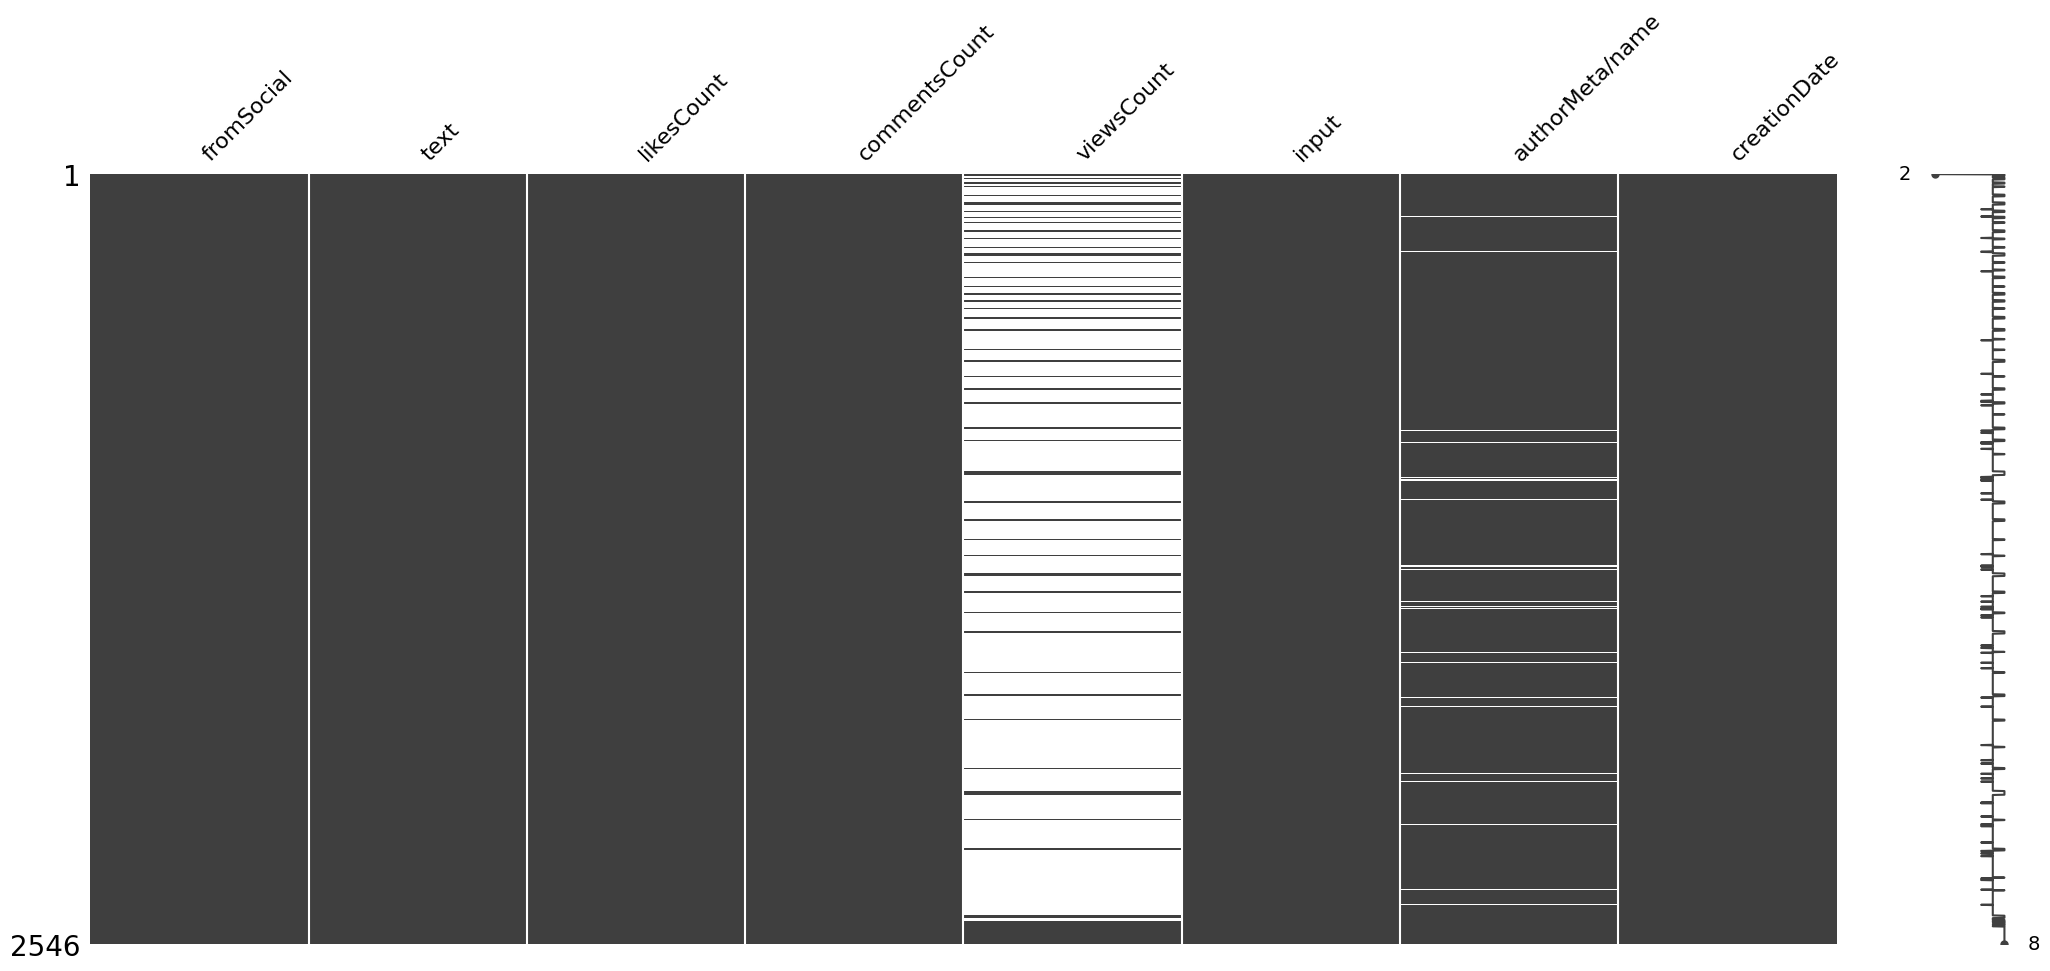

In [10]:
msno.matrix(df)

In [11]:
df['creationDate'] = pd.to_datetime(df['creationDate'])
df['input'] = df['input'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   fromSocial       2546 non-null   object             
 1   text             2543 non-null   object             
 2   likesCount       2545 non-null   float64            
 3   commentsCount    2545 non-null   float64            
 4   viewsCount       321 non-null    float64            
 5   input            2546 non-null   category           
 6   authorMeta/name  2483 non-null   object             
 7   creationDate     2545 non-null   datetime64[ns, UTC]
dtypes: category(1), datetime64[ns, UTC](1), float64(3), object(3)
memory usage: 142.0+ KB


# Analysis

## Social Media

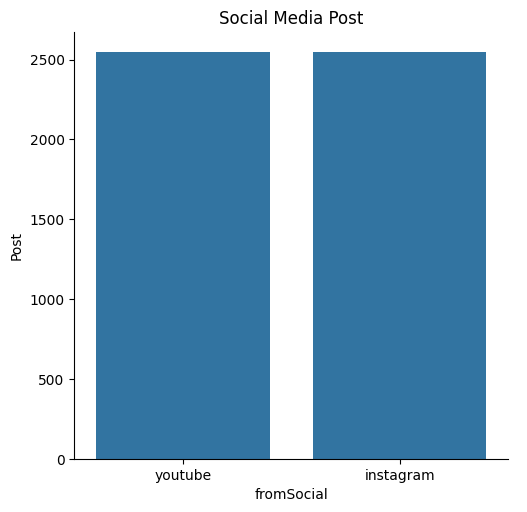

In [13]:
sns.catplot(
    df,
    kind='bar',
    x=df['fromSocial'],
    y=df['input'].count(),
)

plt.title('Social Media Post')
plt.ylabel('Post')
plt.show()

## Posted Time

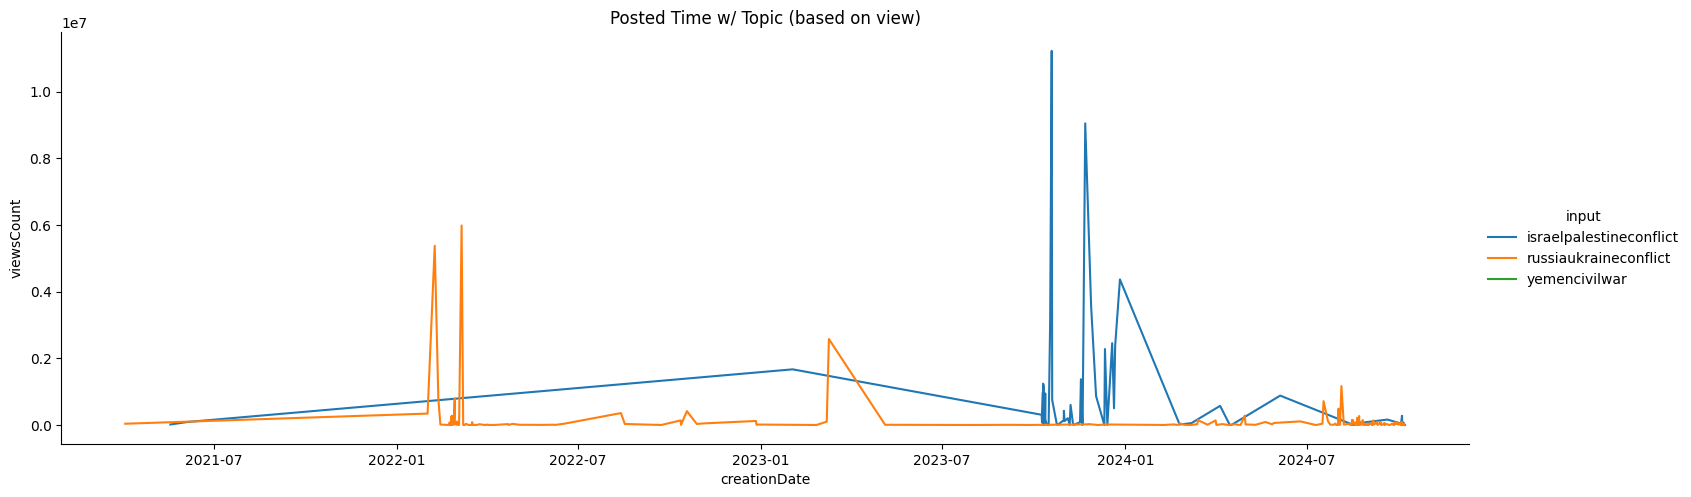

In [14]:
sns.relplot(
    df,
    kind='line',
    x=df['creationDate'],
    y=df['viewsCount'],
    aspect=3,
    hue=df['input'],
)

plt.title('Posted Time w/ Topic (based on view)')
plt.show()

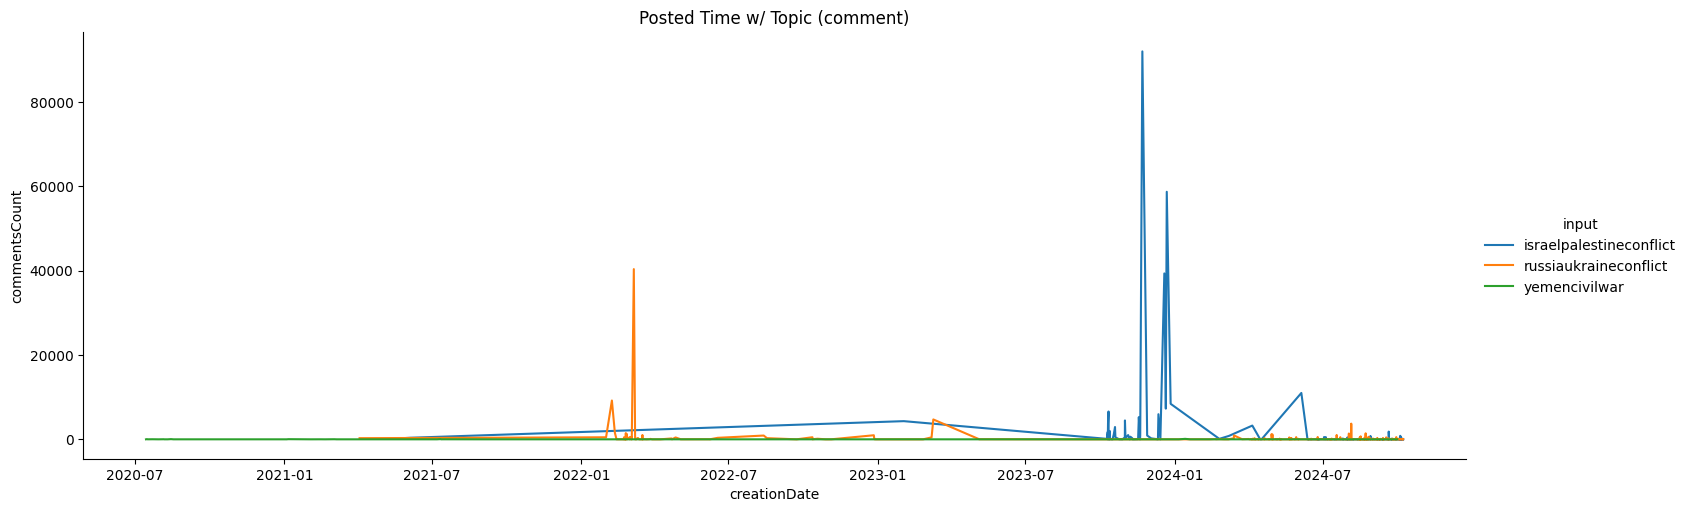

In [15]:
sns.relplot(
    df,
    kind='line',
    x=df['creationDate'],
    y=df['commentsCount'],
    aspect=3,
    hue=df['input'],
)

plt.title('Posted Time w/ Topic (comment)')
plt.show()

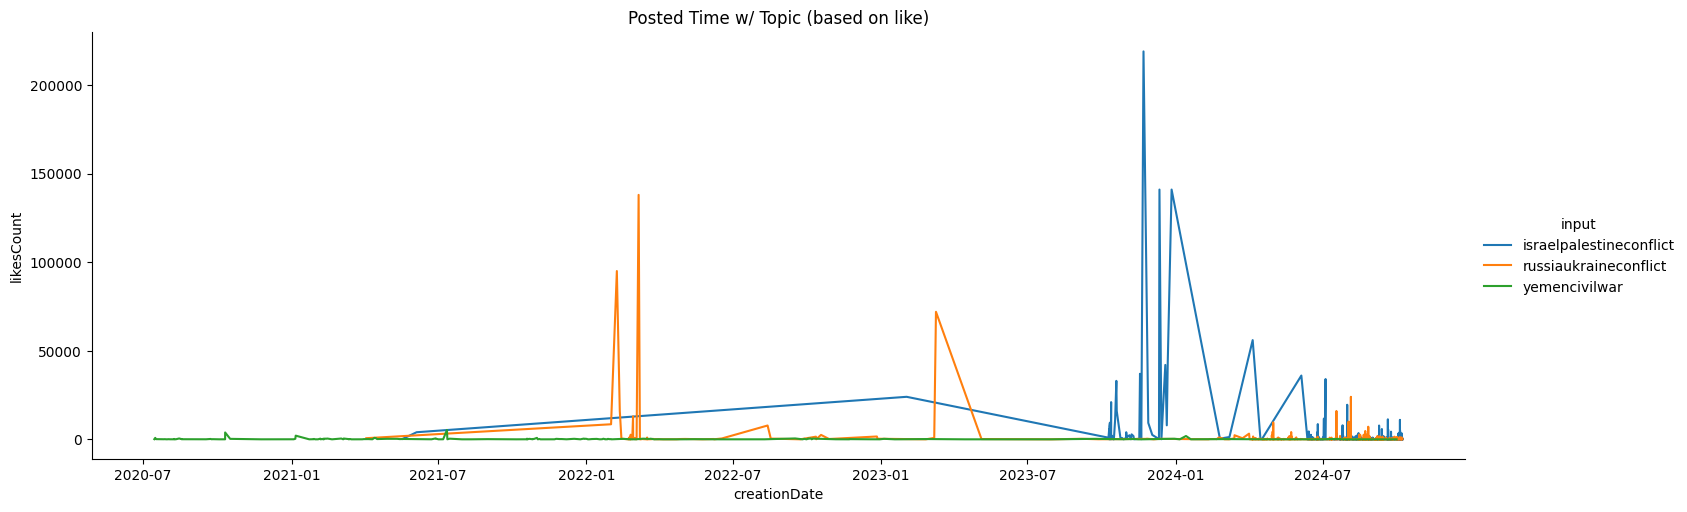

In [16]:
sns.relplot(
    df,
    kind='line',
    x=df['creationDate'],
    y=df['likesCount'],
    aspect=3,
    hue=df['input'],
)

plt.title('Posted Time w/ Topic (based on like)')
plt.show()

## Author

In [17]:
top_30_author_df = df.groupby(['authorMeta/name'], as_index=False)['viewsCount'].sum().sort_values(by='viewsCount', ascending=False).reset_index(drop=True).head(30)
top_30_author_df.head(20)

,authorMeta/name,viewsCount
0,India Today,15840050.0
1,Piers Morgan Uncensored,14393084.0
2,WION,12633573.0
3,Amit Sengupta,6212930.0
4,Muslim Central,5826898.0
5,CNN-News18,3835470.0
6,Hindustan Times,3010817.0
7,The Military Show,2659623.0
8,Daily Podcast,2580394.0
9,TRT World,2319059.0


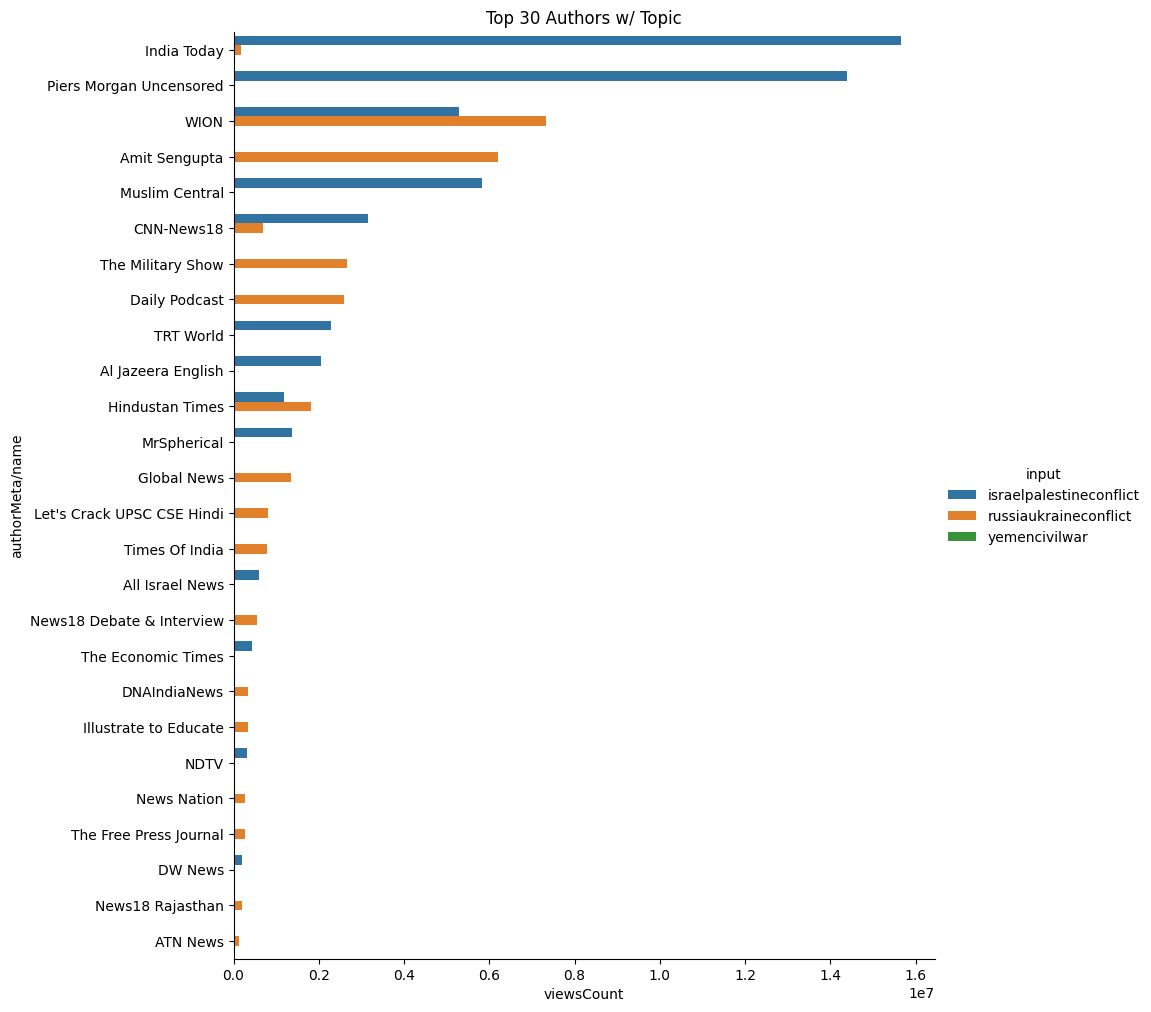

In [120]:
sns.catplot(
    data=top_30_author_df,
    kind='bar',
    x=top_30_author_df['viewsCount'],
    y=top_30_author_df['authorMeta/name'],
    height=10,
    hue="input",
    ci=None,

)

plt.title('Top 30 Authors w/ Topic')
plt.show()

In [20]:
# Group by 'authorMeta/name' and aggregate the counts
result = df.groupby(['authorMeta/name'], as_index=False).agg({
    'viewsCount': 'sum',
    'commentsCount': 'sum',
    'likesCount': 'sum'
}).sort_values(by='viewsCount', ascending=False).reset_index(drop=True)

# Get the top 30 authors
top_30_authors = result.head(30)

# Display the result
top_30_authors


,authorMeta/name,viewsCount,commentsCount,likesCount
0,India Today,15840050.0,4374.0,46716.0
1,Piers Morgan Uncensored,14393084.0,197151.0,311900.0
2,WION,12633573.0,54896.0,224300.0
3,Amit Sengupta,6212930.0,10940.0,113700.0
4,Muslim Central,5826898.0,22655.0,233000.0
5,CNN-News18,3835470.0,1918.0,15186.0
6,Hindustan Times,3010817.0,15380.0,56736.0
7,The Military Show,2659623.0,7259.0,54400.0
8,Daily Podcast,2580394.0,4708.0,72000.0
9,TRT World,2319059.0,6222.0,141643.0


## Word Cloud

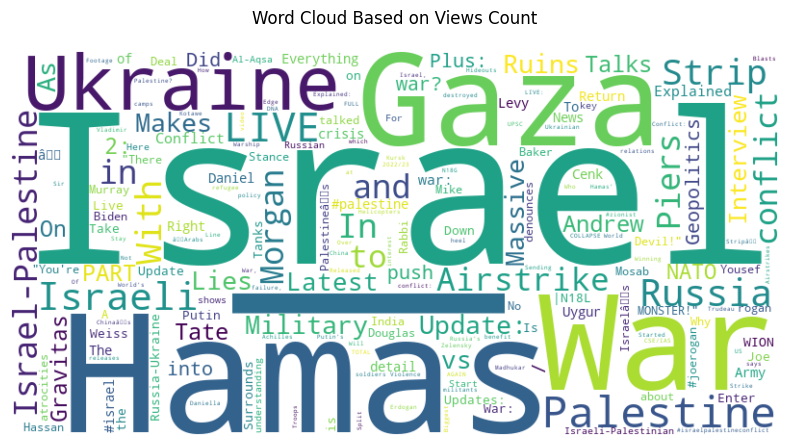

In [138]:

df_filtered = df.dropna(subset=['viewsCount'])

word_freq = {}

# Loop through each row in the filtered DataFrame
for index, row in df_filtered.iterrows():
    text = row['text']
    views = row['viewsCount']
    
    words = text.split()
    
    for word in words:
        word_freq[word] = word_freq.get(word, 0) + views


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud Based on Views Count', y=1.05)
plt.show()


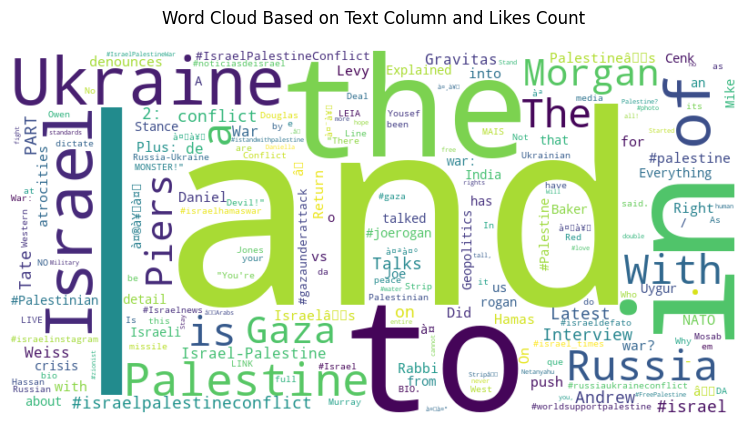

In [22]:
df_likes_filtered = df.dropna(subset=['likesCount', 'text'])
word_freq_likes = {}


# Loop through each row in the filtered DataFrame for likes
for index, row in df_likes_filtered.iterrows():
    text = row['text']
    likes = row['likesCount']
    
    # Split the text into words
    words = text.split()
    
    # Update the word frequencies based on likesCount
    for word in words:
        word_freq_likes[word] = word_freq_likes.get(word, 0) + likes


wordcloud_likes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_likes)

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_likes, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Based on Text Column and Likes Count', y=1.05)



plt.tight_layout()
plt.show()


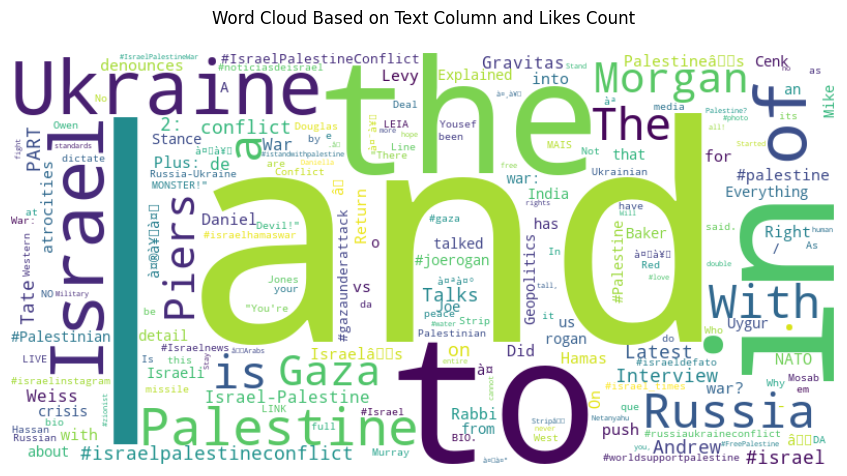

In [26]:

df_comments_filtered = df.dropna(subset=['commentsCount', 'text'])
word_freq_comments = {}

# Loop through each row in the filtered DataFrame for comments
for index, row in df_comments_filtered.iterrows():
    text = row['text']
    comments = row['commentsCount']
    
    # Split the text into words
    words = text.split()
    
    # Update the word frequencies based on commentsCount
    for word in words:
        word_freq_comments[word] = word_freq_comments.get(word, 0) + comments

wordcloud_comments = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_comments)

plt.figure(figsize=(17, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_likes, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Based on Text Column and Likes Count', y=1.05)

plt.tight_layout()
plt.show()
